In [1705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
import csv

In [1706]:
data = pd.read_csv('input.csv')

In [1707]:
data.head()

,v,t,distance,rating,car_or_bus
0,19.210586,0.138049,2.652,3,car
1,30.848229,0.171485,5.290,3,car
2,13.560101,0.067699,0.918,3,bus
3,19.766679,0.389544,7.700,3,bus
4,25.807401,0.154801,3.995,2,car


In [1708]:
X = data.loc[:, ['rating', 'distance', 't', 'v']]
y = data.loc[:, ['car_or_bus']]

In [1709]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0,
                                                    test_size=0.5)

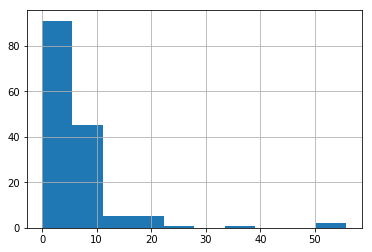

In [1710]:
X['distance'].hist()

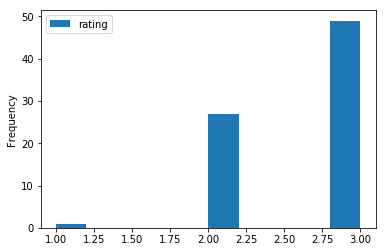

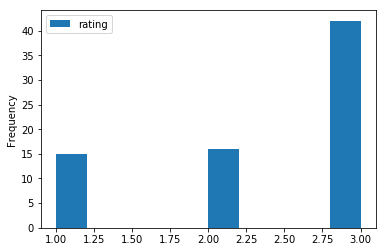

In [1711]:
data.loc[data['car_or_bus'] == 'car', ['rating']].plot.hist()
data.loc[data['car_or_bus'] == 'bus', ['rating']].plot.hist()

In [1712]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=0, n_estimators=15)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1713]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, clf.predict(X_train))
validation_acc = accuracy_score(y_test, clf.predict(X_test))
print('Train Accuracy:', train_acc)
print('Validation Accuracy:', validation_acc)

Train Accuracy: 1.0
Validation Accuracy: 0.7066666666666667


In [1714]:
import time
import os

current_timestamp = int(time.time())
submission_path = '{}.csv'.format(current_timestamp)

if not os.path.exists('submissions'):
    os.makedirs('submissions')

print(submission_path)
pd.DataFrame(clf.predict(X_test)).to_csv(submission_path, index=True)

1543334855.csv


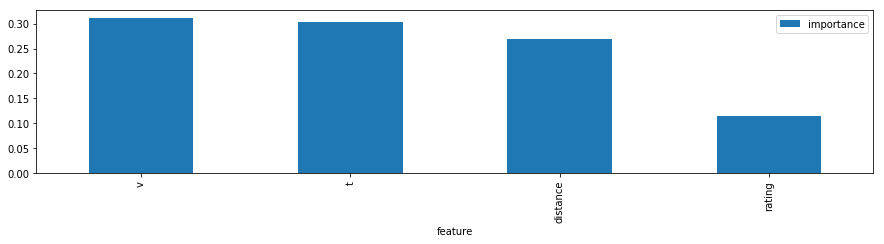

In [1715]:
if hasattr(clf, 'coef_'):
    df_importances = sorted(list(zip(X.columns, clf.coef_.ravel())), key=lambda tpl: tpl[1], reverse=True)
else:
    df_importances= sorted(list(zip(X.columns, clf.feature_importances_.ravel())), key=lambda tpl: tpl[1], reverse=True)
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = df_importances.set_index('feature')
df_importances.plot(kind='bar', figsize=(15, 3))
plt.show()